In [13]:
pip install scapy

Note: you may need to restart the kernel to use updated packages.


In [14]:
from scapy.all import rdpcap
from scapy.layers.inet import IP, TCP, UDP
from scapy.layers.dns import DNS, DNSQR
from scapy.layers.http import HTTPRequest
from collections import Counter

pcap_path = '/home/jovyan/data/commnet.pcap'  # Altere o caminho se necessário

packets = rdpcap(pcap_path)

ips_src = Counter()
ips_dst = Counter()
proto_count = Counter()
dns_queries = []
http_hosts = []
ldap_access = []

for pkt in packets:
    if IP in pkt:
        ips_src[pkt[IP].src] += 1
        ips_dst[pkt[IP].dst] += 1

        proto = pkt[IP].proto
        proto_name = {6: "TCP", 17: "UDP"}.get(proto, str(proto))
        proto_count[proto_name] += 1

        # DNS
        if pkt.haslayer(DNS) and pkt.haslayer(DNSQR):
            dns_queries.append(pkt[DNSQR].qname.decode())

        # HTTP
        if pkt.haslayer(HTTPRequest):
            http_hosts.append(pkt[HTTPRequest].Host.decode())

        # LDAP (TCP 389 ou 636)
        if pkt.haslayer(TCP) and pkt[TCP].dport in [389, 636]:
            ldap_access.append(f"{pkt[IP].src} -> {pkt[IP].dst}:{pkt[TCP].dport}")

# --- Resultado resumido
print("=== IPs de Origem ===")
for ip, count in ips_src.most_common():
    print(f"{ip}: {count}")

print("\n=== IPs de Destino ===")
for ip, count in ips_dst.most_common():
    print(f"{ip}: {count}")

print("\n=== Protocolos Detectados ===")
for proto, count in proto_count.items():
    print(f"{proto}: {count} pacotes")

print("\n=== Requisições DNS ===")
for dns in set(dns_queries):
    print(f"- {dns}")

print("\n=== Hosts HTTP Acessados ===")
for host in set(http_hosts):
    print(f"- {host}")

print("\n=== Conexões LDAP Detectadas ===")
for conn in ldap_access:
    print(f"- {conn}")


=== IPs de Origem ===
172.16.2.168: 1751
172.16.3.4: 859
172.16.61.46: 621
172.16.200.3: 169
172.16.4.19: 147
172.16.4.128: 130
172.16.200.4: 128
0.0.0.0: 34
172.16.4.6: 10
172.16.3.84: 10
172.16.1.86: 10
172.16.1.132: 10
172.16.4.91: 10
169.254.74.166: 9
172.16.3.36: 7
172.16.0.95: 7
172.16.3.1: 6
172.16.0.228: 5
172.16.2.41: 4
172.16.0.37: 3
172.16.2.230: 3
172.16.2.195: 3
172.32.16.45: 1
172.16.0.61: 1
172.16.2.231: 1
172.16.1.33: 1
172.16.2.158: 1
172.16.1.57: 1
172.16.2.217: 1
172.16.78.17: 1
172.16.3.34: 1
172.16.0.69: 1
172.16.78.30: 1
172.16.1.185: 1
172.16.3.42: 1
172.16.2.148: 1
172.16.79.5: 1
172.16.3.139: 1
172.16.0.28: 1
172.16.2.120: 1
169.254.77.81: 1
172.16.3.109: 1
172.16.0.253: 1
172.16.3.58: 1
172.16.0.39: 1
172.16.2.188: 1
172.16.0.56: 1
172.16.2.21: 1
172.16.78.48: 1
172.16.2.159: 1
172.16.2.73: 1
172.16.1.168: 1
172.16.3.13: 1
172.16.0.26: 1
172.16.3.81: 1
172.16.0.106: 1
172.16.0.218: 1
172.16.2.34: 1
172.16.0.130: 1
172.16.0.174: 1
172.16.78.65: 1
172.16.3.5: 1


In [15]:
pip install matplotlib seaborn pandas

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install scapy

Note: you may need to restart the kernel to use updated packages.


Top 10 IPs de Origem:
 src_ip
172.16.2.168    1751
172.16.3.4       859
172.16.61.46     621
172.16.200.3     169
172.16.4.19      147
172.16.4.128     130
172.16.200.4     128
0.0.0.0           34
172.16.4.6        10
172.16.4.91       10
Name: count, dtype: int64

Top 10 IPs de Destino:
 dst_ip
172.16.2.168       2117
172.16.3.4          859
172.16.61.46        399
172.16.4.19         145
172.16.4.128        129
172.16.3.255         82
172.16.200.3         76
172.16.200.4         70
255.255.255.255      34
169.254.255.255      11
Name: count, dtype: int64

Protocolos:
 protocol
TCP        2088
UDP        1861
Raw          36
Padding      22
Name: count, dtype: int64


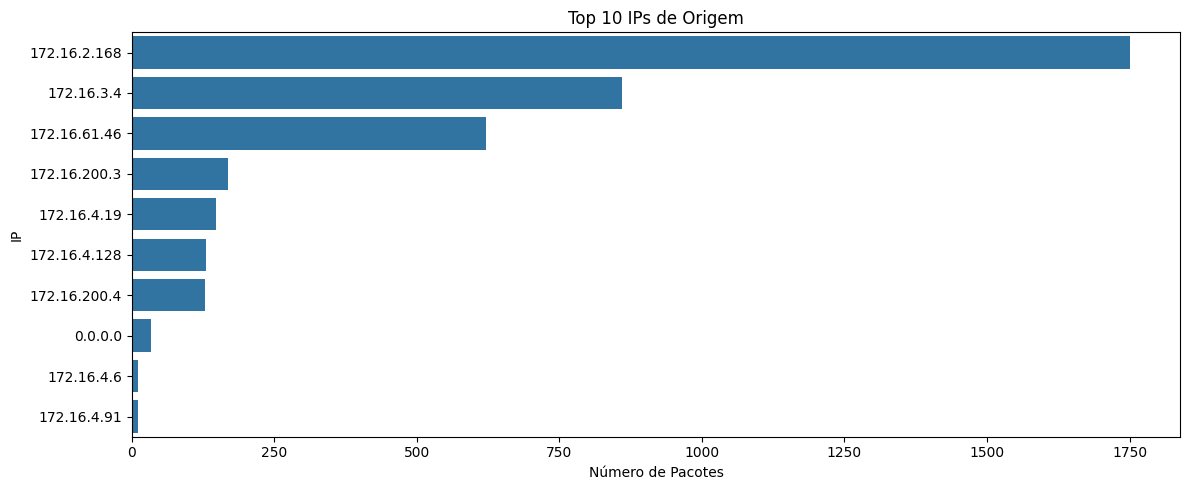

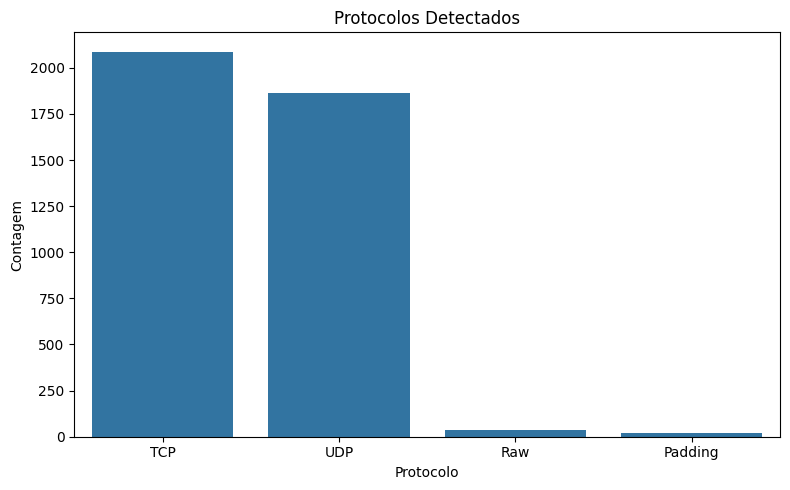

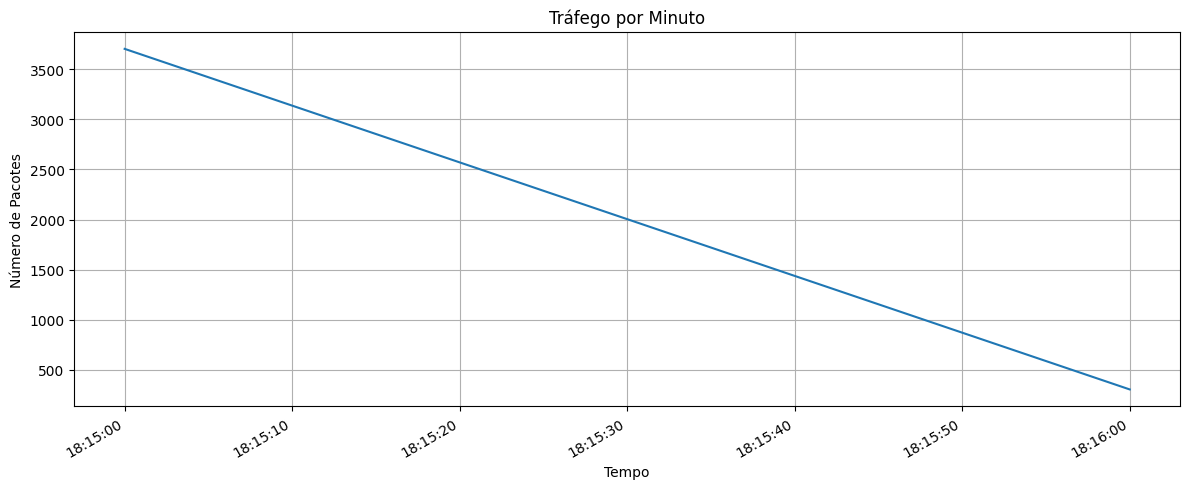

In [17]:
from scapy.all import rdpcap, IP, TCP, UDP
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime

# === CONFIGURE O CAMINHO DO ARQUIVO PCAP ===
pcap_file = '/home/jovyan/data/commnet.pcap'

# === Carrega os pacotes ===
packets = rdpcap(pcap_file)

src_ips = []
dst_ips = []
protocols = []
timestamps = []

for pkt in packets:
    if IP in pkt:
        src_ips.append(pkt[IP].src)
        dst_ips.append(pkt[IP].dst)
        if TCP in pkt:
            protocols.append('TCP')
        elif UDP in pkt:
            protocols.append('UDP')
        else:
            protocols.append(pkt.lastlayer().name)
        timestamps.append(datetime.fromtimestamp(float(pkt.time)))

# === Constrói o DataFrame ===
df = pd.DataFrame({
    'src_ip': src_ips,
    'dst_ip': dst_ips,
    'protocol': protocols,
    'timestamp': timestamps
})

# === Estatísticas básicas ===
print("Top 10 IPs de Origem:\n", df['src_ip'].value_counts().head(10))
print("\nTop 10 IPs de Destino:\n", df['dst_ip'].value_counts().head(10))
print("\nProtocolos:\n", df['protocol'].value_counts())

# === Gráfico: IPs de origem ===
plt.figure(figsize=(12,5))
sns.countplot(y='src_ip', data=df, order=df['src_ip'].value_counts().head(10).index)
plt.title('Top 10 IPs de Origem')
plt.xlabel('Número de Pacotes')
plt.ylabel('IP')
plt.tight_layout()
plt.show()

# === Gráfico: Protocolos ===
plt.figure(figsize=(8,5))
sns.countplot(x='protocol', data=df, order=df['protocol'].value_counts().index)
plt.title('Protocolos Detectados')
plt.xlabel('Protocolo')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

# === Gráfico de Atividade no Tempo ===
df['minute'] = df['timestamp'].dt.floor('min')
plt.figure(figsize=(12,5))
df.groupby('minute').size().plot()
plt.title('Tráfego por Minuto')
plt.xlabel('Tempo')
plt.ylabel('Número de Pacotes')
plt.grid()
plt.tight_layout()
plt.show()


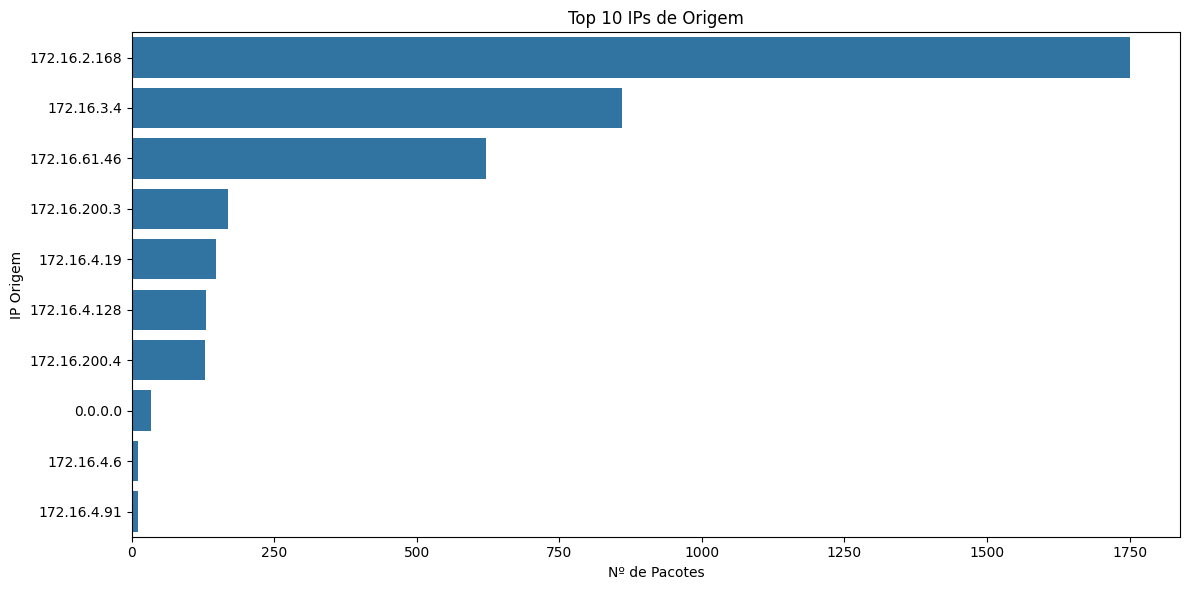

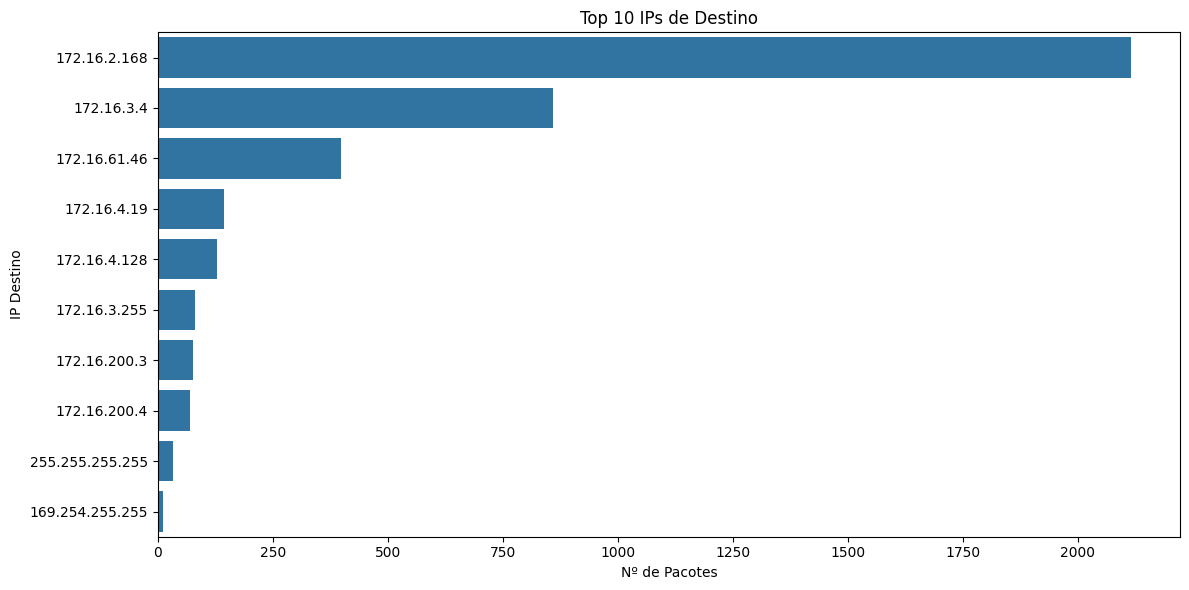

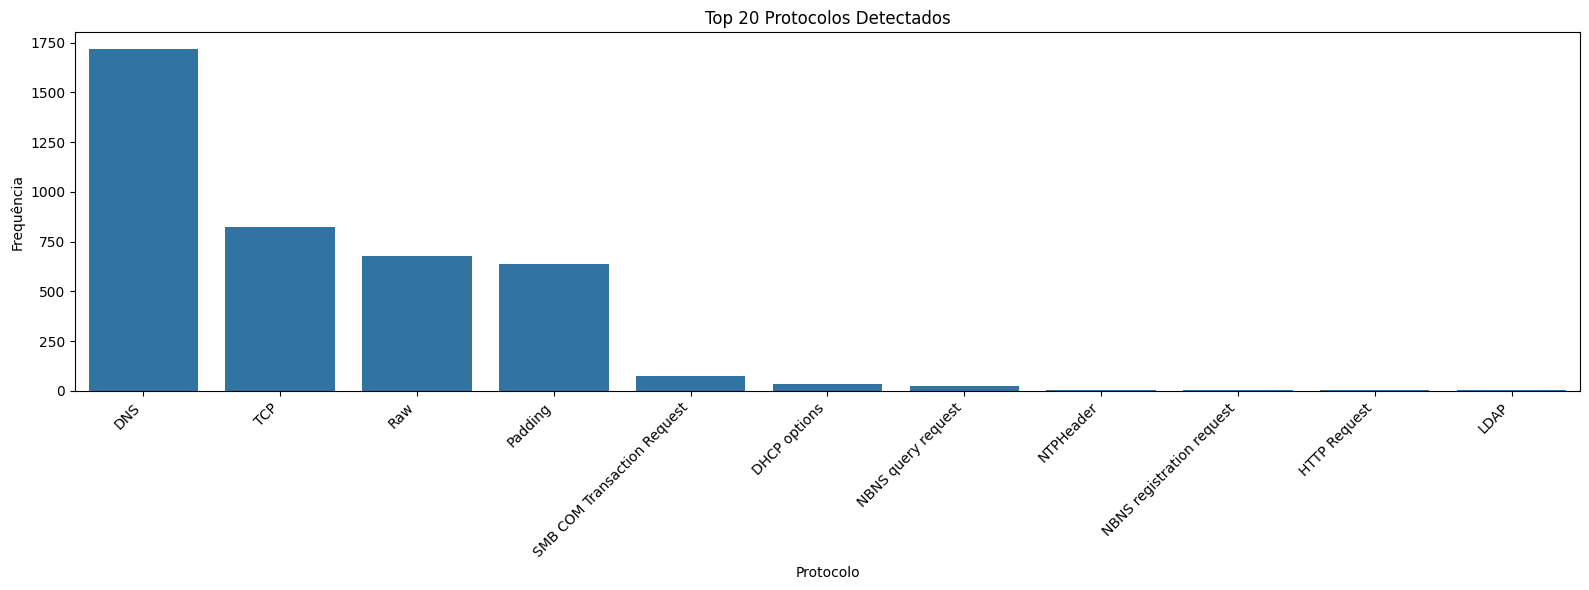

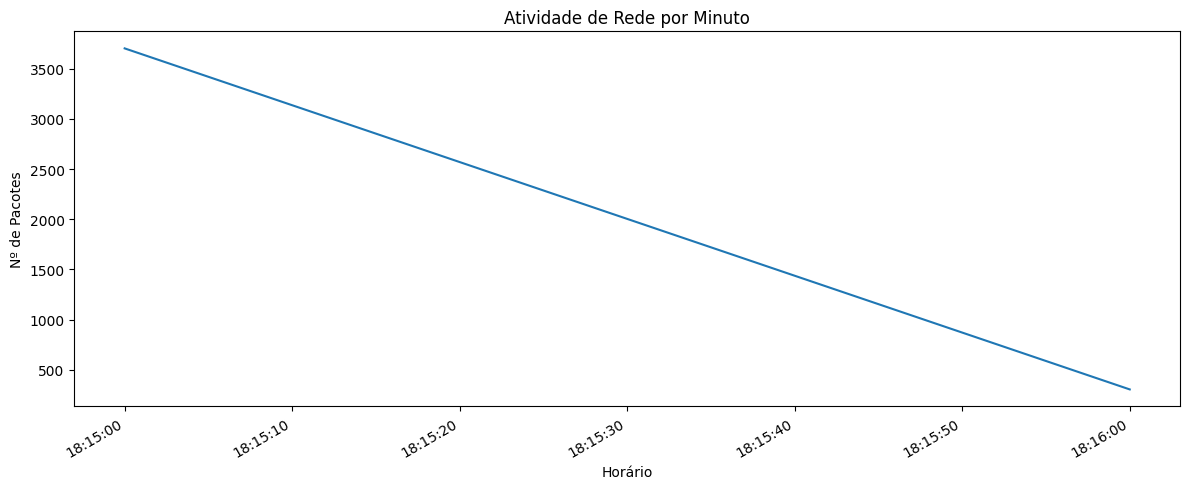

In [18]:
from scapy.all import rdpcap, IP, TCP, UDP, DNS, DNSQR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import os

# === Parâmetros ===
pcap_path = '/home/jovyan/data/commnet.pcap'
export_path = '/home/jovyan/data/'  # onde salvar os CSVs
df_csv = os.path.join(export_path, 'trafego_completo.csv')
top_ips_csv = os.path.join(export_path, 'top_ips.csv')

# === Carrega o .pcap ===
packets = rdpcap(pcap_path)

# === Inicializa coletores ===
src_ips, dst_ips, protocols, timestamps, src_ports, dst_ports, dns_queries = [], [], [], [], [], [], []

# === Itera pacotes ===
for pkt in packets:
    if IP in pkt:
        ip_layer = pkt[IP]
        src_ips.append(ip_layer.src)
        dst_ips.append(ip_layer.dst)
        protocols.append(pkt.lastlayer().name)
        timestamps.append(datetime.fromtimestamp(float(pkt.time)))

        if TCP in pkt or UDP in pkt:
            sport = pkt.sport
            dport = pkt.dport
            src_ports.append(sport)
            dst_ports.append(dport)
        else:
            src_ports.append(None)
            dst_ports.append(None)

        if pkt.haslayer(DNS) and pkt.haslayer(DNSQR):
            dns_queries.append(pkt[DNSQR].qname.decode('utf-8'))
        else:
            dns_queries.append(None)

# === Constrói DataFrame ===
df = pd.DataFrame({
    'timestamp': timestamps,
    'src_ip': src_ips,
    'dst_ip': dst_ips,
    'src_port': src_ports,
    'dst_port': dst_ports,
    'protocol': protocols,
    'dns_query': dns_queries
})

# === Salva CSV completo ===
df.to_csv(df_csv, index=False)

# === Top IPs de origem e destino ===
top_src = df['src_ip'].value_counts().head(15)
top_dst = df['dst_ip'].value_counts().head(15)

# === Exporta top IPs para CSV ===
top_df = pd.DataFrame({
    'src_ip': top_src.index,
    'src_count': top_src.values,
    'dst_ip': top_dst.index,
    'dst_count': top_dst.values
})
top_df.to_csv(top_ips_csv, index=False)

# === Visualizações ===
plt.figure(figsize=(12, 6))
sns.countplot(y=df['src_ip'], order=df['src_ip'].value_counts().iloc[:10].index)
plt.title('Top 10 IPs de Origem')
plt.xlabel('Nº de Pacotes')
plt.ylabel('IP Origem')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y=df['dst_ip'], order=df['dst_ip'].value_counts().iloc[:10].index)
plt.title('Top 10 IPs de Destino')
plt.xlabel('Nº de Pacotes')
plt.ylabel('IP Destino')
plt.tight_layout()
plt.show()

top_protocols = df['protocol'].value_counts().nlargest(20).index
filtered_df = df[df['protocol'].isin(top_protocols)]

plt.figure(figsize=(16, 6))
sns.countplot(x=filtered_df['protocol'], order=top_protocols)
plt.title('Top 20 Protocolos Detectados')
plt.xlabel('Protocolo')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
df['timestamp'].dt.floor('min').value_counts().sort_index().plot()
plt.title('Atividade de Rede por Minuto')
plt.xlabel('Horário')
plt.ylabel('Nº de Pacotes')
plt.tight_layout()
plt.show()
